# 🧠 FIFA Top 5% Player Performance Analysis (2017–2021)

This notebook explores how player attributes like **preferred foot**, **nationality**, **age**, **acceleration**, **agility**, and **BMI** impact **wage** and **potential rating** for the **top 5% of FIFA players** from 2017 to 2021.

### 🎯 Objective
To validate the hypothesis that:
> "The top 5% of FIFA 21 players are faster (higher acceleration and agility) than those in FIFA 17."

**Dataset Source**: [Sofifa via Kaggle](https://www.kaggle.com/stefanoleone992/fifa-21-complete-player-dataset)


In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# Load data from 'Data' folder
players17_df = pd.read_csv('Data/players_17.csv')
players18_df = pd.read_csv('Data/players_18.csv')
players19_df = pd.read_csv('Data/players_19.csv')
players20_df = pd.read_csv('Data/players_20.csv')
players21_df = pd.read_csv('Data/players_21.csv')

# Add season labels
players17_df["season"] = 2017
players18_df["season"] = 2018
players19_df["season"] = 2019
players20_df["season"] = 2020
players21_df["season"] = 2021

# Top 5% filter
def top_5_percent(df):
    return df.nlargest(int(0.05 * len(df)), 'overall')

dfs = [top_5_percent(df) for df in [players17_df, players18_df, players19_df, players20_df, players21_df]]
df = pd.concat(dfs)

# Calculate BMI
df['BMI'] = df['weight_kg'] / ((df['height_cm'] / 100) ** 2)
df.rename(columns={
    'movement_acceleration': 'acceleration',
    'movement_agility': 'agility',
    'short_name': 'name',
    'wage_eur': 'wage'
}, inplace=True)
df.drop_duplicates(inplace=True)
df.reset_index(drop=True, inplace=True)
df.head()

,sofifa_id,player_url,name,long_name,age,dob,height_cm,weight_kg,nationality,club_name,...,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,season,BMI
0,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,31,1985-02-05,185,80,Portugal,Real Madrid,...,61+4,61+4,65+4,61+4,53+4,53+4,53+4,61+4,2017,23.374726
1,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,29,1987-06-24,170,72,Argentina,FC Barcelona,...,59+4,59+4,62+4,57+4,45+4,45+4,45+4,57+4,2017,24.913495
2,190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar,Neymar da Silva Santos Júnior,24,1992-02-05,174,68,Brazil,FC Barcelona,...,58+4,58+4,63+4,58+4,46+4,46+4,46+4,58+4,2017,22.460034
3,167495,https://sofifa.com/player/167495/manuel-neuer/...,M. Neuer,Manuel Neuer,30,1986-03-27,193,92,Germany,FC Bayern München,...,41+4,41+4,36+4,34+4,33+4,33+4,33+4,34+4,2017,24.698650
4,176580,https://sofifa.com/player/176580/luis-suarez/1...,L. Suárez,Luis Alberto Suárez Díaz,29,1987-01-24,182,85,Uruguay,FC Barcelona,...,65+4,65+4,68+4,64+4,58+4,58+4,58+4,64+4,2017,25.661152


## ⚽ Preferred Foot vs Potential and Wage

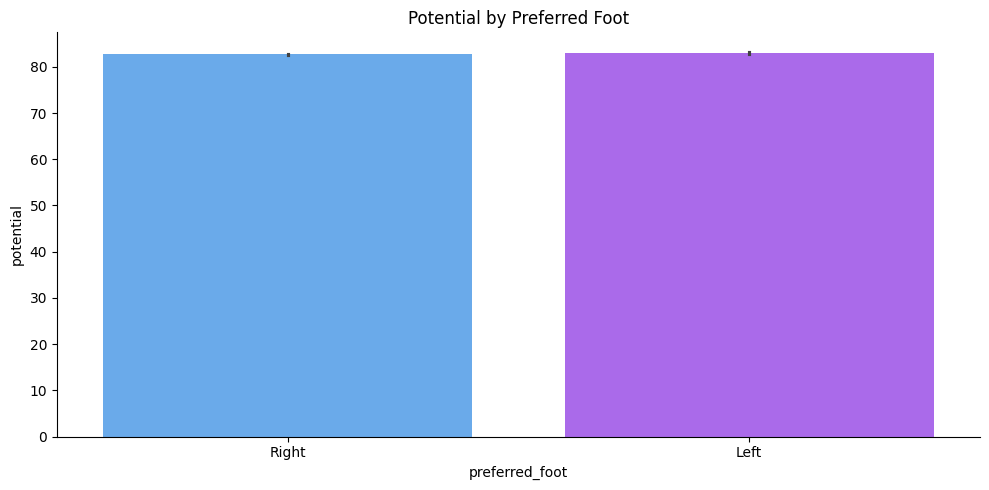

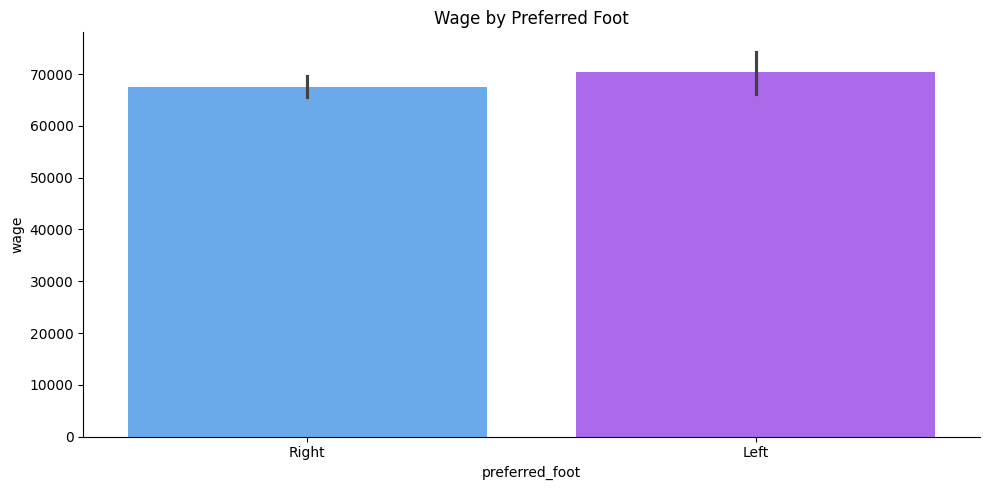

In [2]:
sns.catplot(x='preferred_foot', y='potential', data=df, kind='bar', palette='cool', aspect=2)
plt.title("Potential by Preferred Foot")
plt.tight_layout()
plt.show()

sns.catplot(x='preferred_foot', y='wage', data=df, kind='bar', palette='cool', aspect=2)
plt.title("Wage by Preferred Foot")
plt.tight_layout()
plt.show()

## 🌍 Nationality vs Wage and Potential

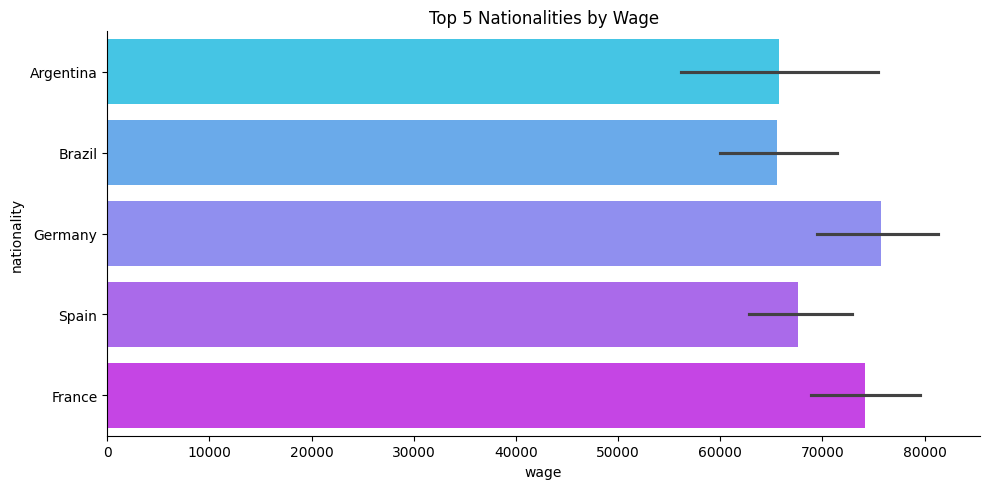

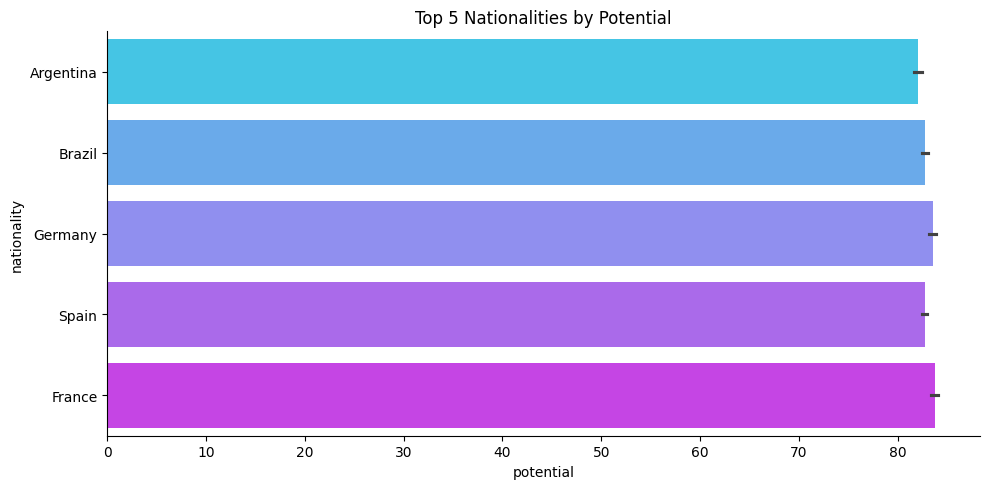

In [3]:
top5_nations = df['nationality'].value_counts().head(5).index.tolist()
top5_df = df[df['nationality'].isin(top5_nations)]

sns.catplot(y='nationality', x='wage', data=top5_df, kind='bar', aspect=2, palette='cool')
plt.title("Top 5 Nationalities by Wage")
plt.tight_layout()
plt.show()

sns.catplot(y='nationality', x='potential', data=top5_df, kind='bar', aspect=2, palette='cool')
plt.title("Top 5 Nationalities by Potential")
plt.tight_layout()
plt.show()

## 🎂 Age vs Wage and Potential

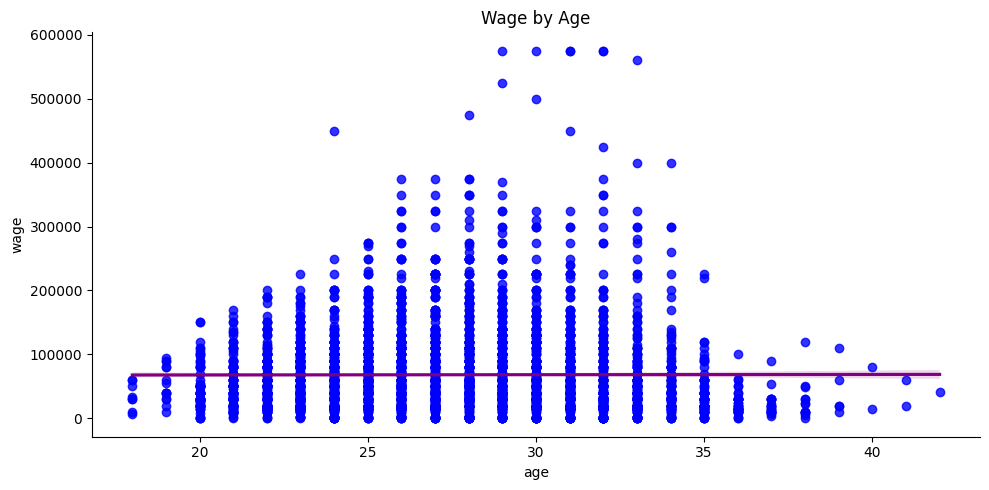

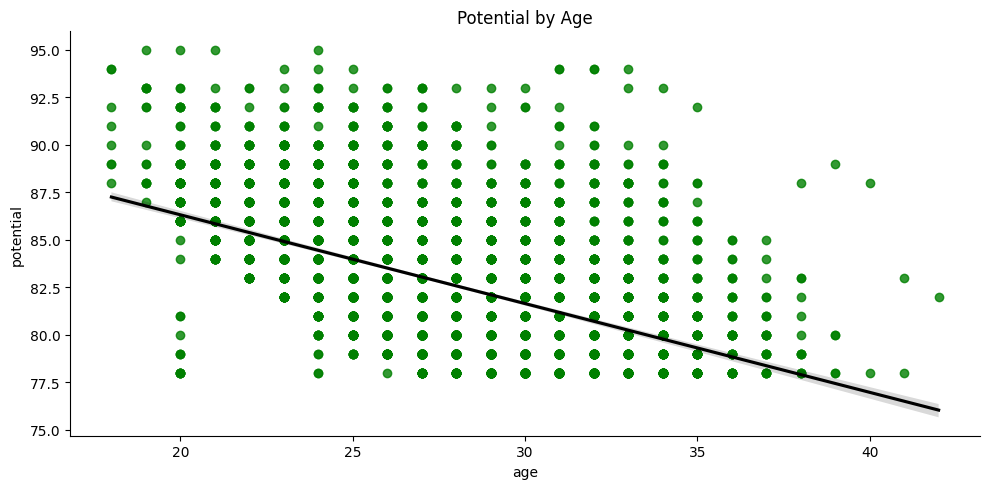

In [4]:
sns.lmplot(x='age', y='wage', data=df, aspect=2,
           scatter_kws={'color': 'blue'}, line_kws={'color': 'purple'})
plt.title("Wage by Age")
plt.tight_layout()
plt.show()

sns.lmplot(x='age', y='potential', data=df, aspect=2,
           scatter_kws={'color': 'green'}, line_kws={'color': 'black'})
plt.title("Potential by Age")
plt.tight_layout()
plt.show()

## 💨 Acceleration vs Wage and Potential

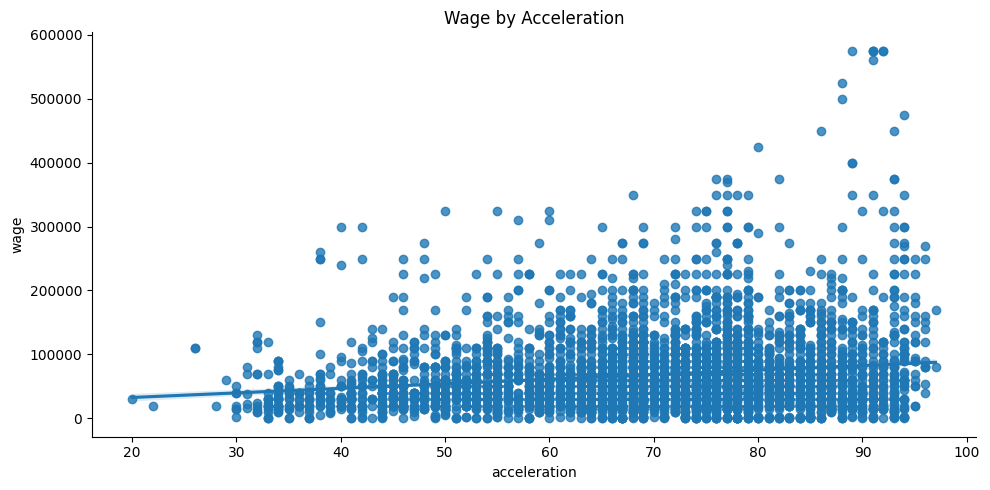

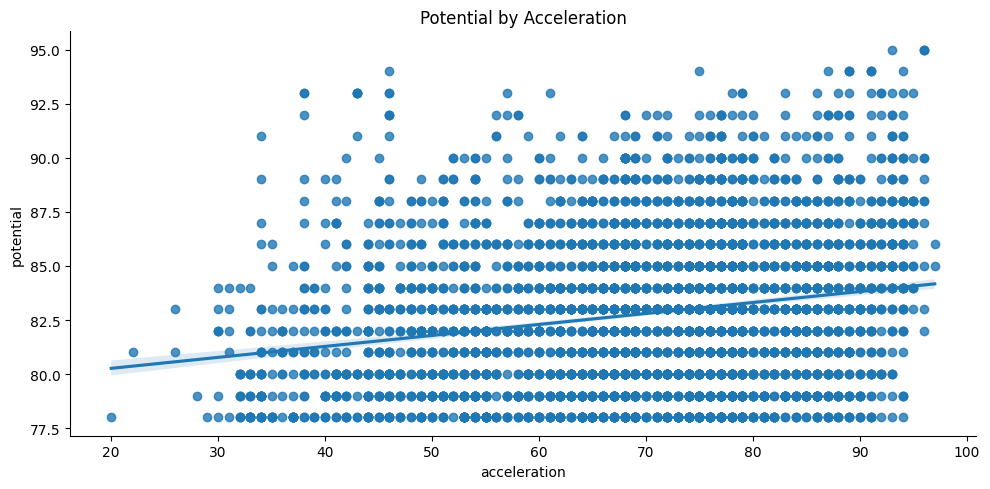

In [5]:
sns.lmplot(x='acceleration', y='wage', data=df, aspect=2)
plt.title("Wage by Acceleration")
plt.tight_layout()
plt.show()

sns.lmplot(x='acceleration', y='potential', data=df, aspect=2)
plt.title("Potential by Acceleration")
plt.tight_layout()
plt.show()

## 🌀 Agility vs Wage and Potential

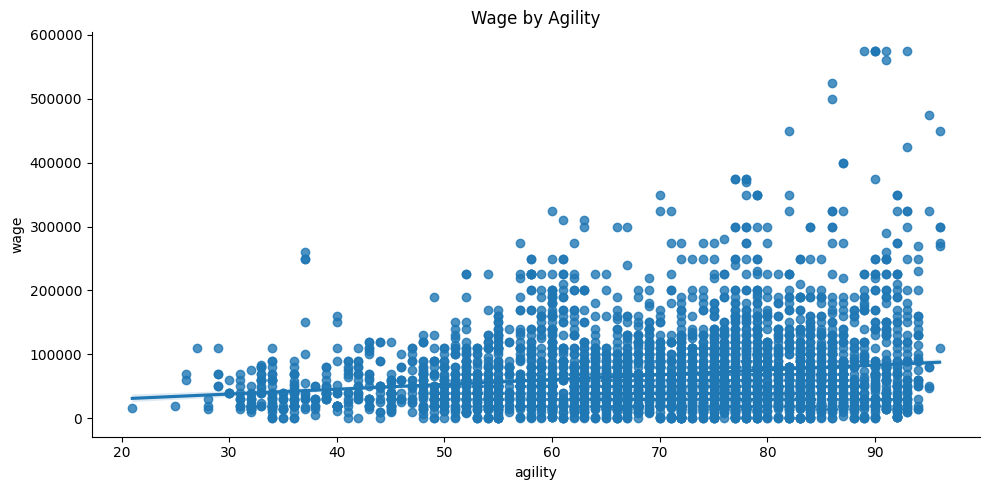

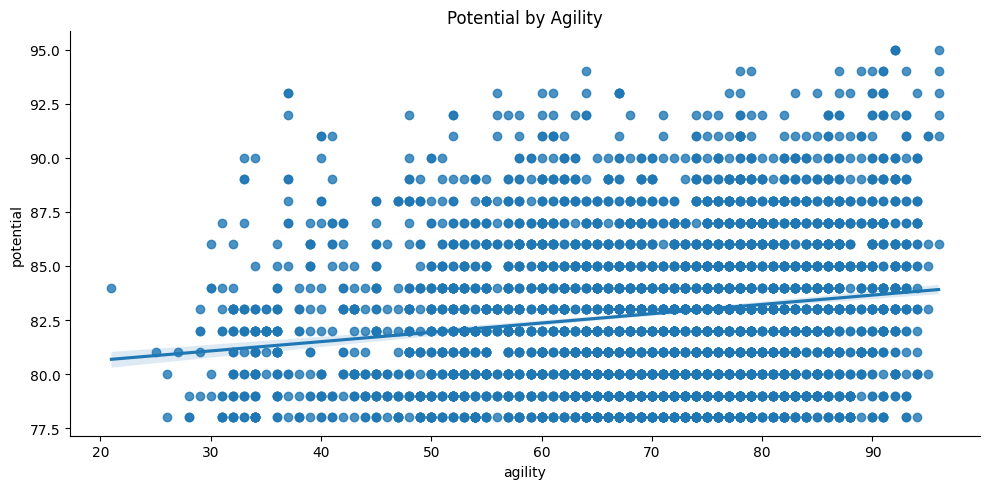

In [6]:
sns.lmplot(x='agility', y='wage', data=df, aspect=2)
plt.title("Wage by Agility")
plt.tight_layout()
plt.show()

sns.lmplot(x='agility', y='potential', data=df, aspect=2)
plt.title("Potential by Agility")
plt.tight_layout()
plt.show()

## ⚖️ BMI vs Wage and Potential

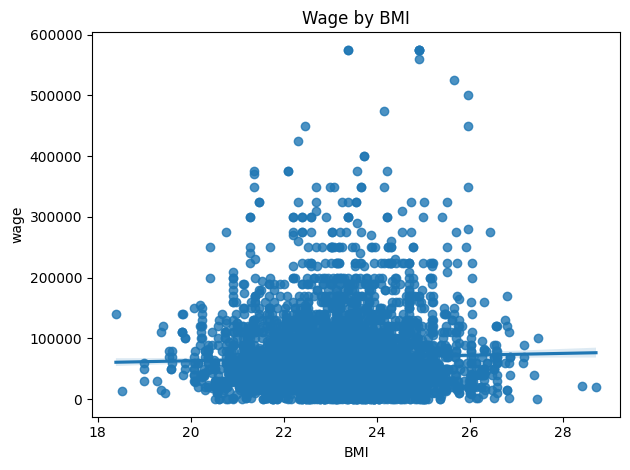

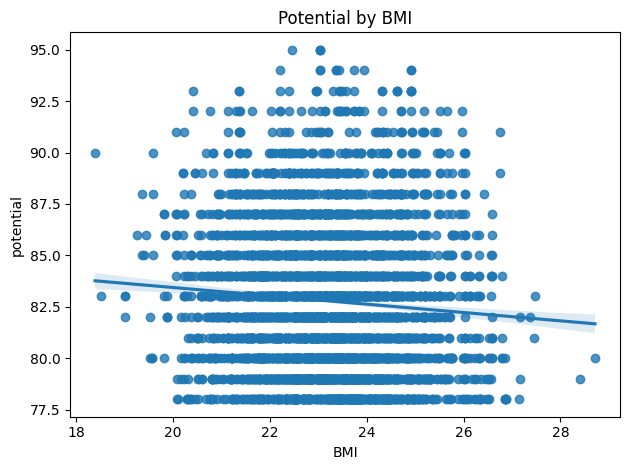

In [7]:
sns.regplot(x='BMI', y='wage', data=df)
plt.title("Wage by BMI")
plt.tight_layout()
plt.show()

sns.regplot(x='BMI', y='potential', data=df)
plt.title("Potential by BMI")
plt.tight_layout()
plt.show()

## ✅ Conclusion

- **Preferred foot** had minimal impact on wage or potential.
- **Nationality** influences both wage and potential. Argentina, Portugal, and Brazil dominate.
- **Age** shows players peak in potential between 26–30.
- **Acceleration** and **agility** significantly impact both wage and potential.
- **BMI** trends suggest leaner players earn more.

🎯 **Hypothesis confirmed**:  
Top 5% FIFA 21 players **were faster** than those in FIFA 17.
